# K-Means customer segmentation  

The goal of this analysis is to understand how the client have reacted to a variaty of dicounts offered by a company. For this purpose we have a dataset with the following variables. 


- **gender:** is the identified gender of the customer.
- **age:** is the age of the customer at the time of the promotion period.
- **customer_ID:** is the customer membership identification.
- **became_member:** is the date when the customer became a member.
- **income:** is the self reported income of the customer at the time of the promotion period.
- **money_off_combination_r** or **news_letter_combination_r columns:** F to O shows the number of each offer received.
- **money_off_combination_v** or **news_letter_combination_v columns:** P to Y shows the number of each offer viewed.
- **money_off_combination_c** or **news_letter_combination_c columns:** Z to AI shows the number of each offer completed.
- **no.transactions:** is the number of transactions made during the time of the promotion.
- **ave.offer.time:** is the average time taken to complete an offer.
- **ave.spending:** is the average amount spend across the transactions recorded during the time of the promotion.
- **total.spending:** is the total amount spent during the time of the promotion.
- **rate.viewed:** is the proportion of offers viewed, relative to the number received.
- **rate.complete:** is the proportion of offers completed, relative to the number received.

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

In [3]:
#Supress warnings
warnings.simplefilter('ignore')

## 1. Load data

In [4]:
#Reading the CSV file
data = pd.read_csv("combined_data.csv", sep=",")
data

,gender,age,customer_ID,became_member_on,income,money_off.10.10.7.r,money_off.10.10.5.r,news_letter.0.0.4.r,money_off.5.5.7.r,money_off.20.5.10.r,...,money_off.10.2.10.c,news_letter.0.0.3.c,money_off.5.5.5.c,money_off.10.2.7.c,no.transactions,ave.offer.time,ave.spending,total.spending,rate.viewed,rate.complete
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,12/02/2017,NaN,0,0,0,0,1,...,1,0,0,0,9,552.0,2.266667,20.40,1.000000,0.400000
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,15/07/2017,112000.0,0,0,1,1,0,...,0,0,0,0,3,528.0,25.670000,77.01,NaN,0.500000
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,12/07/2018,NaN,0,0,0,1,0,...,0,0,0,0,6,NaN,2.383333,14.30,1.000000,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,09/05/2017,100000.0,1,0,0,1,0,...,0,0,1,0,7,384.0,22.752857,159.27,1.000000,0.750000
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,04/08/2017,NaN,0,0,1,0,3,...,0,0,0,0,3,NaN,1.550000,4.65,0.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,F,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,04/06/2018,54000.0,0,1,0,0,0,...,0,0,0,0,7,NaN,2.861429,20.03,1.000000,NaN
16996,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,13/07/2018,72000.0,0,0,1,1,0,...,0,0,0,0,7,420.0,3.710000,25.97,0.333333,0.333333
16997,M,49.0,01d26f638c274aa0b965d24cefe3183f,26/01/2017,73000.0,0,0,1,0,1,...,0,0,0,0,8,NaN,4.967500,39.74,0.333333,NaN
16998,F,83.0,9dc1421481194dcd9400aec7c9ae6366,07/03/2016,50000.0,1,1,0,1,0,...,0,0,0,0,14,456.0,13.547857,189.67,1.000000,1.000000


## 2. Exploratory data analysis

The initial data sent had information for 17.000 different customers. The company could not collect all the necessary information from all customers for various reasons. This led to some records being incomplete and were removed from the analysis. After selecting all the customers with complete information, we have data from 11.916 customers. 

**Exploratory data analysis:** 
 - 53.6% of the customer that participated in the promotion are male, 44.8% are female, and 0.01% decided not to disclose their gender. 
 - By age group, around half of the clients are over 56 years old, with 23.5% between 56 and 65, and 27.6% over 65 years old. The third-largest group is the customer between 46 and 55 years old with 21.6%, followed by age group 36-45 with 12.9%, age group 26-35 with 8.3% and age group 18-25 with 5.8%. 
 - In terms of income and money spent, the customers with the higher income also spent the most. The highest income group is the over 65 years old with an average salary of 73,257 and average spending of 149.72. In contrast, customers between the age of 18 and 25 had the lowest average salary at 50,924, and it was also the group with the lowest average money spent at 112.92. 
 - From the plots, we can observe that female customers who participated in the promotion have a higher income and spend more money than male customers. Also, we can observe that regardless of their income level, most of the clients spend between 1 and 250 on the promotion. 

### 2.1 Data summary 

In [5]:
#Check for missing values

#Get the columns that contains missing values
data_nullCol = data.columns[data.isnull().any()]

#Count missing values
data_null = data[data_nullCol].isnull().sum()
data_null


gender            2175
age               2175
income            2175
ave.offer.time    4226
ave.spending       422
rate.viewed        166
rate.complete     4226
dtype: int64

In [6]:
#Remove missing values
data = data.dropna()
print("The saphe of the raw data without NAN values is: " + str(data.shape))

The saphe of the raw data without NAN values is: (11916, 41)


In [7]:
#Calculate the proportion of male and female in the dataset
data.gender.value_counts(normalize=True)

M    0.536338
F    0.448640
O    0.015022
Name: gender, dtype: float64

In [8]:
#Summary of variable "age"
data["age"].describe()

count    11916.000000
mean        55.224236
std         17.035316
min         18.000000
25%         44.000000
50%         56.000000
75%         67.000000
max        101.000000
Name: age, dtype: float64

In [9]:
#Create a new variable called "Age_group" to help summarise information

#Define the function to create the new variable
def age_group(row):
    if row["age"] >= 18 and row["age"] <= 25:
        return "Age group: 18-25"
    if row["age"] >= 26 and row["age"] <= 35:
        return "Age group: 26-35"
    if row["age"] >= 26 and row["age"] <= 45:
        return "Age group: 36-45"
    if row["age"] >= 46 and row["age"] <= 55:
        return "Age group: 46-55"
    if row["age"] >= 56 and row["age"] <= 65:
        return "Age group: 56-65"
    else:
        return "Age group: over 65"

#Apply the function and create the new variable
data["Age_group"]= data.apply(lambda row: age_group(row), axis=1)

In [10]:
#Count of customer by age group
data.Age_group.value_counts()

Age group: over 65    3298
Age group: 56-65      2807
Age group: 46-55      2578
Age group: 36-45      1543
Age group: 26-35       992
Age group: 18-25       698
Name: Age_group, dtype: int64

In [11]:
#Proportion of customer by age group
data.Age_group.value_counts(normalize=True)

Age group: over 65    0.276771
Age group: 56-65      0.235566
Age group: 46-55      0.216348
Age group: 36-45      0.129490
Age group: 26-35      0.083249
Age group: 18-25      0.058577
Name: Age_group, dtype: float64

In [12]:
#Average income by age group
data.groupby(["Age_group"])["income"].mean()

Age_group
Age group: 18-25      50924.068768
Age group: 26-35      51474.798387
Age group: 36-45      60492.546986
Age group: 46-55      70547.711404
Age group: 56-65      72851.086569
Age group: over 65    73257.428745
Name: income, dtype: float64

In [13]:
#Average spending by age group
data.groupby(["Age_group"])["total.spending"].mean()

Age_group
Age group: 18-25      112.922206
Age group: 26-35      111.769980
Age group: 36-45      134.430356
Age group: 46-55      141.584833
Age group: 56-65      146.733805
Age group: over 65    149.720588
Name: total.spending, dtype: float64

### 2.2 Plots

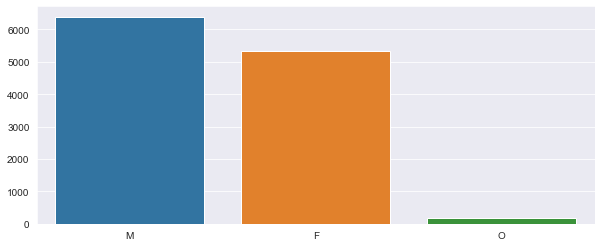

In [14]:
#Plot the distribution of customers by gender
genders = data.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

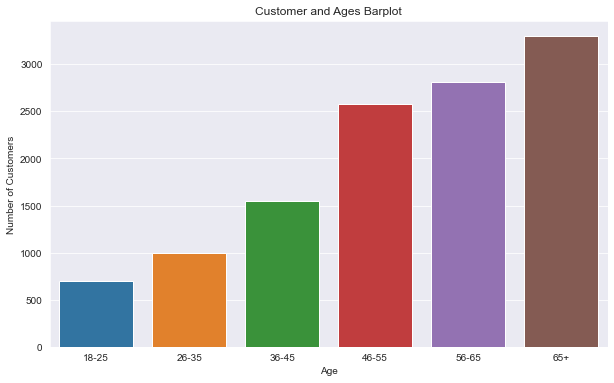

In [15]:
#Plot the distribution of customers by age group
age18_25 = data.age[(data.age >= 18) & (data.age <= 25)]
age26_35 = data.age[(data.age >= 26) & (data.age <= 35)]
age36_45 = data.age[(data.age >= 36) & (data.age <= 45)]
age46_55 = data.age[(data.age >= 46) & (data.age <= 55)]
age56_65 = data.age[(data.age >= 56) & (data.age <= 65)]
age65above = data.age[data.age >= 66]

x = ["18-25","26-35","36-45","46-55","56-65", "65+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65), len(age65above)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='income'>

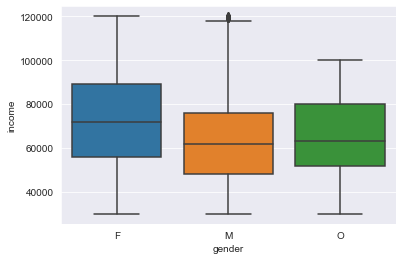

In [16]:
#Boxplot of the income based on gender
sns.boxplot(x="gender", y="income", data=data)

<AxesSubplot:xlabel='gender', ylabel='total.spending'>

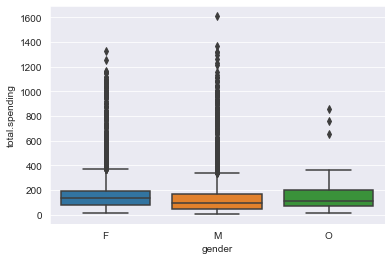

In [17]:
#Boxplot of the income based on gender
sns.boxplot(x="gender", y="total.spending", data=data)

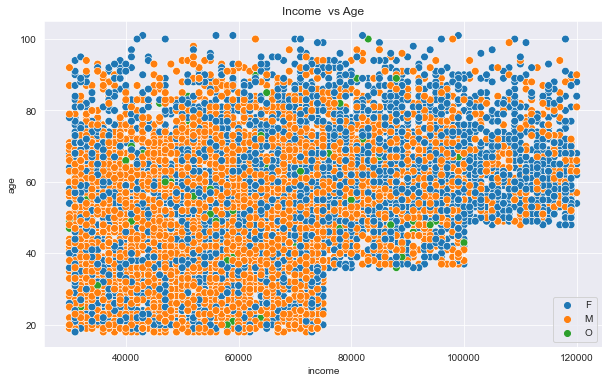

In [18]:
#Scatterplot of income against age
plt.figure(figsize=(10,6))
sns.scatterplot(x = "income" , y = "age", hue="gender", data = data, s = 60 )
plt.xlabel("income")
plt.ylabel("age") 
plt.title("Income  vs Age")
plt.legend()
plt.show()

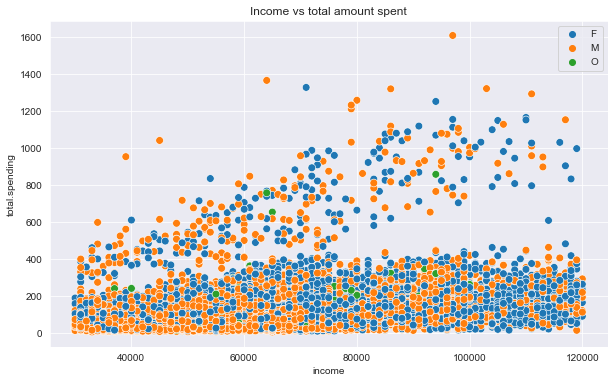

In [19]:
#Scatterplot of income against total amount spent 
plt.figure(figsize=(10,6))
sns.scatterplot(x = "income" , y = "total.spending", hue="gender", data = data, s = 60 )
plt.xlabel("income")
plt.ylabel("total.spending") 
plt.title("Income vs total amount spent")
plt.legend()
plt.show()

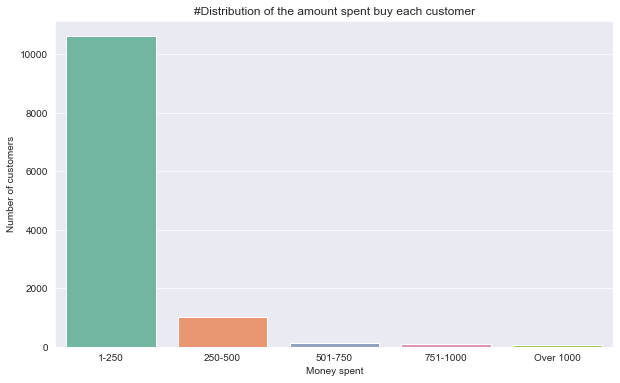

In [20]:
#Distribution of the amount spent buy each customer
ss1_250 = data["total.spending"][(data["total.spending"] >= 1) & (data["total.spending"] <= 250)]
ss21_500 = data["total.spending"][(data["total.spending"] >= 251) & (data["total.spending"] <= 500)]
ss41_750 = data["total.spending"][(data["total.spending"] >= 501) & (data["total.spending"] <= 750)]
ss61_1000 = data["total.spending"][(data["total.spending"] >= 751) & (data["total.spending"] <= 1000)]
ss61_10001 = data["total.spending"][(data["total.spending"] >= 1000)]

score_xx = ["1-250", "250-500", "501-750", "751-1000", "Over 1000"]
score_yy = [len(ss1_250.values), len(ss21_500.values), len(ss41_750.values), len(ss61_1000.values), len(ss61_10001.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_xx, y=score_yy,palette="Set2")
plt.title("#Distribution of the amount spent buy each customer")
plt.xlabel("Money spent")
plt.ylabel("Number of customers")
plt.show()
                                    


# 2. Cluster analysis using K-Means

In [21]:
#Select the variables to use in the model
cluster_variables = data[["gender", "age", "income", "no.transactions", "ave.offer.time", "ave.spending", "total.spending"]]

#Change "gender" variable to numeric
cluster_variables["gender"].replace(["F", "M", "O"], [0, 1, 2], inplace=True)
cluster_variables["gender"] = pd.to_numeric(cluster_variables["gender"],errors="coerce")
cluster_variables.head()


,gender,age,income,no.transactions,ave.offer.time,ave.spending,total.spending
3,0,75.0,100000.0,7,384.0,22.752857,159.27
5,1,68.0,70000.0,3,522.0,19.243333,57.73
8,1,65.0,53000.0,3,451.2,12.143333,36.43
12,1,58.0,51000.0,4,456.0,3.905000,15.62
13,0,61.0,57000.0,6,422.0,14.258333,85.55


In [22]:
#Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.

wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(cluster_variables)
    wcss.append(km.inertia_)

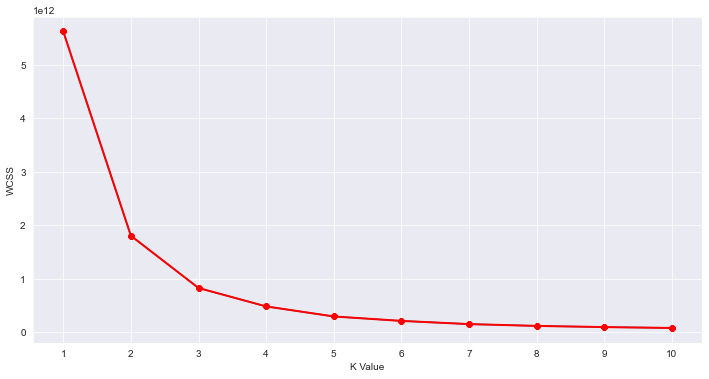

In [23]:
#Plot the elbow curve. we select the number of clusters where the value of WCSS 
#starts to plateau. In this case, 5 will be the optimal number of clusters. 

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [24]:
#Create a K-Means object with 5 clusters
km = KMeans(n_clusters=5)

#Fitting the input data
km.fit(cluster_variables)

#Asing each customer to a group 
clusters = km.predict(cluster_variables)

In [25]:
#Add the group as a new column in the dataframe and also the age_group variable 
data["Clusters"] = clusters
data

,gender,age,customer_ID,became_member_on,income,money_off.10.10.7.r,money_off.10.10.5.r,news_letter.0.0.4.r,money_off.5.5.7.r,money_off.20.5.10.r,...,money_off.5.5.5.c,money_off.10.2.7.c,no.transactions,ave.offer.time,ave.spending,total.spending,rate.viewed,rate.complete,Age_group,Clusters
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,09/05/2017,100000.0,1,0,0,1,0,...,1,0,7,384.0,22.752857,159.27,1.000000,0.750000,Age group: over 65,4
5,M,68.0,e2127556f4f64592b11af22de27a7932,26/04/2018,70000.0,0,0,1,1,0,...,0,0,3,522.0,19.243333,57.73,0.750000,0.500000,Age group: over 65,2
8,M,65.0,389bc3fa690240e798340f5a15918d5c,09/02/2018,53000.0,0,0,0,2,0,...,2,1,3,451.2,12.143333,36.43,1.000000,0.833333,Age group: 56-65,0
12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,11/11/2017,51000.0,0,0,1,0,0,...,0,0,4,456.0,3.905000,15.62,0.666667,0.333333,Age group: 56-65,0
13,F,61.0,aa4862eba776480b8bb9c68455b8c2e1,11/09/2017,57000.0,1,1,0,0,1,...,1,0,6,422.0,14.258333,85.55,1.000000,0.600000,Age group: 56-65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16988,M,64.0,f653cf2d8bba42d0a53c2937ee2e5893,04/01/2018,51000.0,0,0,0,1,0,...,1,0,9,456.0,3.604444,32.44,0.600000,0.600000,Age group: 56-65,0
16990,F,70.0,79edb810789c447e8d212a324b44cc16,10/03/2016,39000.0,0,0,1,0,1,...,1,0,15,375.0,9.583333,143.75,1.000000,0.800000,Age group: over 65,3
16996,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,13/07/2018,72000.0,0,0,1,1,0,...,0,0,7,420.0,3.710000,25.97,0.333333,0.333333,Age group: 56-65,2
16998,F,83.0,9dc1421481194dcd9400aec7c9ae6366,07/03/2016,50000.0,1,1,0,1,0,...,0,0,14,456.0,13.547857,189.67,1.000000,1.000000,Age group: over 65,0


## 3. Analyze the characteristic of each group 

Cluster four contains customers with the highest average age, income, and amount spent. They made fewer purchases than clients in other clusters, but the average spending is the highest. In this cluster, we have clients that don't buy very often but spend more money when they do. 

Opposite to cluster four, we have cluster 3, which contains clients with the lowest average age, income, and total amount spent. The clients in this cluster are young clients who make frequent low-level purchases but spend only half of the amount the client in cluster 4 did. 

Cluster one contains a similar type of clients than in cluster four. On average, they made almost the same amount of purchases but with a slightly lower average spending, leading to a lower total amount spent. They are the second cluster in terms of average age, income, and total spending.  We can also consider these clients as clients who make fewer purchases than the rest but of a higher value. 

Finally, clusters zero and two are clients that sit in the middle between clusters four/one and three. 


In [26]:
#Distribution of gender by cluster
data.groupby(["Clusters", "gender"]).size()

Clusters  gender
0         F         1213
          M         1898
          O           58
1         F         1245
          M          983
          O           39
2         F         1470
          M         1739
          O           48
3         F          722
          M         1438
          O           32
4         F          696
          M          333
          O            2
dtype: int64

In [27]:
#Average income by cluster
data.groupby(["Clusters"])["income"].mean()

Clusters
0     55311.770275
1     89695.191884
2     71612.526865
3     38066.149635
4    109225.024248
Name: income, dtype: float64

In [28]:
#Average income by age group
data.groupby(["Clusters"])["age"].mean()

Clusters
0    51.731145
1    61.715042
2    55.941357
3    48.067518
4    64.639185
Name: age, dtype: float64

In [29]:
#Average income by age group
data.groupby(["Clusters"])["total.spending"].mean()

Clusters
0    117.603695
1    184.689594
2    147.564722
3     88.619037
4    195.479049
Name: total.spending, dtype: float64

In [30]:
#Create a dataframe for each cluster
cluster_0 = data[data["Clusters"]==0]
cluster_0 = cluster_0[["age", "income", "no.transactions", "ave.offer.time", "ave.spending", "total.spending"]]
cluster_0.describe()

,age,income,no.transactions,ave.offer.time,ave.spending,total.spending
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,51.731145,55311.770275,10.365731,402.344683,12.102284,117.603695
std,17.599079,4586.636928,5.320152,128.671617,9.879168,105.006947
min,18.000000,47000.000000,1.000000,0.000000,1.596667,6.800000
25%,39.000000,52000.000000,6.000000,328.000000,4.397059,47.040000
50%,52.000000,55000.000000,10.000000,404.000000,12.806429,93.470000
75%,64.000000,59000.000000,14.000000,483.000000,15.075000,156.460000
max,101.000000,63000.000000,36.000000,714.000000,165.296667,847.520000


In [31]:
cluster_1 = data[data["Clusters"]==1]
cluster_1 = cluster_1[["age", "income", "no.transactions", "ave.offer.time", "ave.spending", "total.spending"]]
cluster_1.describe()

,age,income,no.transactions,ave.offer.time,ave.spending,total.spending
count,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000
mean,61.715042,89695.191884,6.767534,400.302647,27.130300,184.689594
std,12.709844,5468.935686,3.405546,113.677903,20.430806,162.085382
min,36.000000,81000.000000,1.000000,0.000000,10.980000,13.730000
25%,53.000000,85000.000000,4.000000,336.600000,21.595449,96.570000
50%,60.000000,89000.000000,6.000000,402.000000,23.798667,154.480000
75%,70.000000,94000.000000,9.000000,470.000000,26.302143,219.660000
max,101.000000,99000.000000,19.000000,714.000000,278.610000,1608.690000


In [32]:
cluster_2 = data[data["Clusters"]==2]
cluster_2 = cluster_2[["age", "income", "no.transactions", "ave.offer.time", "ave.spending", "total.spending"]]
cluster_2.describe()

,age,income,no.transactions,ave.offer.time,ave.spending,total.spending
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000
mean,55.941357,71612.526865,8.863678,401.338195,17.855636,147.564722
std,16.420924,4620.386965,4.959773,123.126150,14.572466,133.338715
min,18.000000,64000.000000,1.000000,0.000000,2.033125,5.280000
25%,46.000000,68000.000000,5.000000,332.000000,14.847778,63.900000
50%,57.000000,72000.000000,8.000000,400.500000,17.998000,122.960000
75%,67.000000,75000.000000,12.000000,480.000000,20.565000,192.080000
max,100.000000,80000.000000,32.000000,714.000000,263.975000,1365.660000


In [33]:
cluster_3 = data[data["Clusters"]==3]
cluster_3 = cluster_3[["age", "income", "no.transactions", "ave.offer.time", "ave.spending", "total.spending"]]
cluster_3.describe()

,age,income,no.transactions,ave.offer.time,ave.spending,total.spending
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,48.067518,38066.149635,12.117701,411.150274,7.425959,88.619037
std,18.603799,4770.564713,5.286395,141.795856,6.579877,83.631381
min,18.000000,30000.000000,2.000000,0.000000,1.311667,5.540000
25%,32.000000,34000.000000,8.000000,330.000000,3.092947,33.730000
50%,47.000000,38000.000000,12.000000,417.000000,6.982188,68.010000
75%,62.000000,42000.000000,16.000000,506.000000,9.642321,117.995000
max,101.000000,46000.000000,36.000000,714.000000,110.895000,1040.980000


In [36]:
cluster_4 = data[data["Clusters"]==4]
cluster_4 = cluster_4[["age", "income", "no.transactions", "ave.offer.time", "ave.spending", "total.spending"]]
cluster_4.describe()

,age,income,no.transactions,ave.offer.time,ave.spending,total.spending
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,64.639185,109225.024248,6.362755,395.230359,30.114835,195.479049
std,11.435755,5924.098750,3.103761,118.770880,20.625661,169.039509
min,37.000000,100000.000000,1.000000,6.000000,14.290000,14.290000
25%,55.000000,104000.000000,4.000000,332.700000,24.891250,106.450000
50%,63.000000,109000.000000,6.000000,396.000000,27.038000,160.350000
75%,72.000000,114000.000000,8.000000,470.200000,29.117222,232.580000
max,100.000000,120000.000000,17.000000,696.000000,301.310000,1321.420000
